In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import matplotlib.pyplot as plt
import scipy
import copy
from sklearn.metrics import confusion_matrix, recall_score, f1_score

#### Dataset Original

In [ ]:
%pwd

'/content'

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

--2023-04-18 18:17:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [application/x-httpd-php]
Saving to: ‘wdbc.data’

wdbc.data           100%[===================>] 121.19K   310KB/s    in 0.4s    

2023-04-18 18:17:27 (310 KB/s) - ‘wdbc.data’ saved [124103/124103]



In [ ]:
data_orig = pd.read_csv('/content/wdbc.data')

In [ ]:
col_names = ['id', 'diagnosis']

for i in range(1, 31):
    col_names.append('a' + str(i))

In [ ]:
data_orig.columns = col_names

In [ ]:
X_train = data_orig.iloc[:455, 2:12]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      455 non-null    float64
 1   a2      455 non-null    float64
 2   a3      455 non-null    float64
 3   a4      455 non-null    float64
 4   a5      455 non-null    float64
 5   a6      455 non-null    float64
 6   a7      455 non-null    float64
 7   a8      455 non-null    float64
 8   a9      455 non-null    float64
 9   a10     455 non-null    float64
dtypes: float64(10)
memory usage: 35.7 KB


In [ ]:
Y_train = data_orig.loc[:454, ['diagnosis']]
Y_train.head(25)

,diagnosis
0,M
1,M
2,M
3,M
4,M
5,M
6,M
7,M
8,M
9,M


In [ ]:
Y_train = Y_train['diagnosis'].map(lambda diag: 0 if diag == 'B' else 1)
Y_train

0      1
1      1
2      1
3      1
4      1
      ..
450    1
451    0
452    0
453    0
454    0
Name: diagnosis, Length: 455, dtype: int64

In [ ]:
X_train_array = X_train.to_numpy().T
X_train_array.shape

(10, 455)

In [ ]:
X_train_array[:,:3]

array([[2.057e+01, 1.969e+01, 1.142e+01],
       [1.777e+01, 2.125e+01, 2.038e+01],
       [1.329e+02, 1.300e+02, 7.758e+01],
       [1.326e+03, 1.203e+03, 3.861e+02],
       [8.474e-02, 1.096e-01, 1.425e-01],
       [7.864e-02, 1.599e-01, 2.839e-01],
       [8.690e-02, 1.974e-01, 2.414e-01],
       [7.017e-02, 1.279e-01, 1.052e-01],
       [1.812e-01, 2.069e-01, 2.597e-01],
       [5.667e-02, 5.999e-02, 9.744e-02]])

In [ ]:
Y_train_array = Y_train.to_numpy()

n_values = np.max(Y_train_array) + 1
Y_train_array = np.eye(n_values)[Y_train_array]

Y_train_array = Y_train_array.T
Y_train_array.shape

(2, 455)

In [ ]:
Y_train_array[:, :25]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 1., 1.]])

#### Dataset (10 caracteristicas)

<img src="https://github.com/Ricardo-OB/redes_neuronales/blob/main/images/capa_entrada_2.png?raw=true" width="400">

In [2]:
columns = ['id','diagnostico', 'radio', 'textura', 'perimetro', 'area', 'suavidad', 'compacidad', 'concavidad', 'puntos_concavos', 'simetria', 'dimension_fractal']
len(columns)

12

In [3]:
data_original = pd.read_csv('https://raw.githubusercontent.com/viowiy/redes_neuronales/main/datasets/set2_training.csv', sep=",", engine='python', names=columns)

In [4]:
data_original.head()

,id,diagnostico,radio,textura,perimetro,area,suavidad,compacidad,concavidad,puntos_concavos,simetria,dimension_fractal
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [5]:
data_original.describe()

,id,diagnostico,radio,textura,perimetro,area,suavidad,compacidad,concavidad,puntos_concavos,simetria,dimension_fractal
count,4.550000e+02,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,2.871195e+07,0.371429,14.033567,19.001934,91.292022,644.877363,0.095886,0.102587,0.086764,0.047869,0.181805,0.062617
std,1.188293e+08,0.483719,3.440192,4.174479,23.701252,341.533200,0.013749,0.053146,0.078848,0.038406,0.028195,0.006978
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960
25%,8.652800e+05,0.000000,11.705000,15.960000,74.935000,420.050000,0.085855,0.062450,0.027110,0.019575,0.161850,0.057635
50%,8.976040e+05,0.000000,13.200000,18.580000,85.630000,537.900000,0.094950,0.088360,0.061260,0.032640,0.179900,0.061300
75%,8.910734e+06,1.000000,15.705000,21.540000,102.950000,761.500000,0.105000,0.129500,0.125050,0.070525,0.195700,0.065765
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2499.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440


In [9]:
data_original['diagnostico'].sum() / 455

0.37142857142857144

Crear muestras X para entrenamiento, donde ID y Diagnostico no hacen parte

In [6]:
X_train_pre = data_original.iloc[:, 2:]
X_train_pre.head()

,radio,textura,perimetro,area,suavidad,compacidad,concavidad,puntos_concavos,simetria,dimension_fractal
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Normalizar los datos para facilitar el proceso del Gradiente Descendente.

$$
X_{normalizado} = \dfrac{X-X_{min}}{X_{max}-X_{min}}
$$

In [7]:
X_train_normalizado = X_train_pre.copy(deep=True)

In [8]:
# normalizacion min-max
for col in X_train_normalizado.columns:
    min = X_train_normalizado[col].min()
    max = X_train_normalizado[col].max()
    X_train_normalizado[col] = (X_train_normalizado[col] - min) / (max - min)

In [9]:
X_train_normalizado.head()

,radio,textura,perimetro,area,suavidad,compacidad,concavidad,puntos_concavos,simetria,dimension_fractal
0,0.521037,0.022658,0.545989,0.364042,0.680010,0.792037,0.703140,0.731113,0.668446,0.605518
1,0.643144,0.272574,0.615783,0.502017,0.270471,0.181768,0.203608,0.348757,0.344367,0.141323
2,0.601496,0.390260,0.595743,0.449798,0.572941,0.431017,0.462512,0.635686,0.481580,0.211247
3,0.210090,0.360839,0.233501,0.102993,0.973233,0.811361,0.565604,0.522863,0.763481,1.000000
4,0.629893,0.156578,0.630986,0.489705,0.459788,0.347893,0.463918,0.518390,0.342766,0.186816


Transponer la matriz X para que quede de forma `(# de muestras, # de caracteristicas)`

In [10]:
X_train_array = X_train_normalizado.to_numpy().T
X_train_array.shape

(10, 455)

Obtener las etiquetas verdaderas Y

In [11]:
Y_train = data_original.iloc[:, 1]
Y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnostico, dtype: int64

Convertir el vector Y con forma (455,1) a una matriz (2, 455). OneHot Encoding.

$$
\left.\begin{matrix}
Fila \,\, 1 \,\, (Benigno)\\ 
Fila \,\, 2 \,\, (Maligno)
\end{matrix}\right. \begin{bmatrix}
0 & 0 & 0 & ... & 1 & 1 & \\ 
1 & 1 & 1 & ... & 0 & 0 & 
\end{bmatrix}
$$



In [12]:
Y_train_array_pre = Y_train.to_numpy()

Y_train_array = np.eye(2)[Y_train_array_pre]

Y_train_array = Y_train_array.T
Y_train_array.shape

(2, 455)

In [13]:
Y_train_array[:, :3]

array([[0., 0., 0.],
       [1., 1., 1.]])

#### Funciones de Activación

**Tangente Hiperbólica**

$$
tanh(x) = \dfrac{e^x - e^{-x}}{e^x + e^{-x}}
$$

In [14]:
def tanh(Z):
    tanh = ((np.exp(Z) - np.exp(-Z))/(np.exp(Z) + np.exp(-Z)))
    return tanh

## tf.math.tanh

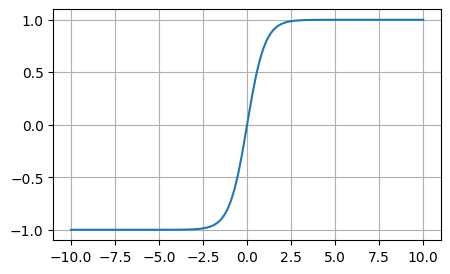

In [15]:
puntos = np.linspace(-10, 10, num=100)
plt.figure(figsize=(5,3))
plt.plot(puntos, tanh(puntos))
plt.grid()
plt.show()

**Derivada de tangente hiperbólica**

$$
f(x) = tanh(x) \\
f'(x) = 1 - tanh^2(x)
$$

In [16]:
def tanh_derivada(Z):
    return 1 - np.power(Z, 2)

**Sigmoide**

$$
\sigma (x) = \dfrac{1}{1+e^{-x}}
$$

In [17]:
def sigmoide(Z):
    Z = np.array(Z, dtype=np.float128)
    sigmoide = 1 / (1 + np.exp(-Z))
    return sigmoide

## tf.math.sigmoid

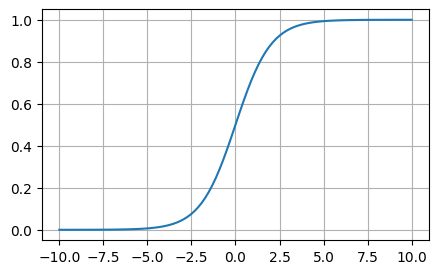

In [18]:
plt.figure(figsize=(5,3))
plt.plot(puntos, sigmoide(puntos))
plt.grid()
plt.show()

**Derivada de Sigmoide**

$$
\sigma ' (x) = \dfrac{e^{-x}}{(1+e^{-x})^2} = \sigma (x) (1 - \sigma (x))
$$

In [19]:
def sigmoide_derivada(Z):
    return Z * (1 - Z)

**Softmax**

$$
\sigma(\vec{z})_i = \dfrac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} \,\,\,\, para \,\, i = 1, ..., K
$$

In [20]:
def softmax(Z):
    e_Z = np.exp(Z - np.max(Z))
    softmax = e_Z / e_Z.sum(axis=0)
    return softmax

## tf.nn.softmax

#### Inicializar Parametros

|Capa   |Tamaño de $W$      |Tamaño de $b$ |
|-------|-------------------|------------------|
|Capa 1 | $$(10 \times 10)$$|$$(10 \times 1)$$ | 
|Capa 2 | $$(12 \times 10)$$|$$(12 \times 1)$$ | 
|Capa 3 | $$(9 \times 12)$$ |$$(9 \times 1)$$  | 
|Capa 4 | $$(5 \times 9)$$  |$$(5 \times 1)$$  | 
|Capa 5 | $$(2 \times 5)$$  |$$(2 \times 1)$$  | 

In [22]:
def inicializar_parametros(neur_x, neur_L1, neur_L2, neur_L3, neur_L4, neur_y):
    """
    neur_x  -- tamaño de la capa de entrada
    neur_L1 -- tamaño de la capa de oculta L1
    neur_L2 -- tamaño de la capa de oculta L2
    neur_L3 -- tamaño de la capa de oculta L3
    neur_L4 -- tamaño de la capa de oculta L4
    neur_y  -- tamaño de la capa de salida
    
    Retorna:
        parametros -- diccionario con los parametros inicializados aleatoriamente
    """
    
    W1 = np.random.randn(neur_L1, neur_x) * 0.1
    b1 = np.zeros((neur_L1, 1))
    W2 = np.random.randn(neur_L2, neur_L1) * 0.1
    b2 = np.zeros((neur_L2, 1))
    W3 = np.random.randn(neur_L3, neur_L2) * 0.1
    b3 = np.zeros((neur_L3, 1))
    W4 = np.random.randn(neur_L4, neur_L3) * 0.1
    b4 = np.zeros((neur_L4, 1))
    W5 = np.random.randn(neur_y, neur_L4) * 0.1
    b5 = np.zeros((neur_y, 1))
    
    parametros = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3, "W4": W4, "b4": b4, "W5": W5, "b5": b5}

    return parametros

In [23]:
parametros_prueba = inicializar_parametros(neur_x=10, neur_L1=10, neur_L2=12, neur_L3=9, neur_L4=5, neur_y=2)
parametros_prueba['W5']

array([[-0.03470262, -0.1510941 , -0.01496282,  0.04403214,  0.03369286],
       [-0.11836062, -0.01005723, -0.02551299, -0.00566843,  0.07361299]])

In [24]:
parametros_prueba['b5']

array([[0.],
       [0.]])

#### Forward propagation

$$ Z^{[1]} = W^{[1]} X + b^{[1]}, \,\,\,\,\, A^{[1]} = tanh(Z^{[1]}) $$ 
$$ Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}, \,\,\,\,\, A^{[2]} = tanh(Z^{[2]}) $$ 
$$ Z^{[3]} = W^{[3]} A^{[2]} + b^{[3]}, \,\,\,\,\, A^{[3]} = tanh(Z^{[3]}) $$
$$ Z^{[4]} = W^{[4]} A^{[3]} + b^{[4]}, \,\,\,\,\, A^{[4]} = tanh(Z^{[4]}) $$ 
$$ Z^{[5]} = W^{[5]} A^{[4]} + b^{[5]}, \,\,\,\,\, A^{[5]} = softmax(Z^{[5]}) → \hat Y $$ 

In [26]:
def forward_propagation(X, parametros):
    """
    X -- datos de entrada: (tamaño de la caracterisitcas, número de ejemplos)
    parametros -- diccionario con los parametros "W" y "b" de cada capa

    Retorna:
        A5 -- salida de la ultima capa (Y sombrero)
        cache -- diccionario con "Z" y "A" de cada capa (necesarios para calcular el backprop de manera eficiente)
    """
    
    W1, b1 = parametros["W1"], parametros["b1"]
    W2, b2 = parametros["W2"], parametros["b2"]
    W3, b3 = parametros["W3"], parametros["b3"]
    W4, b4 = parametros["W4"], parametros["b4"]
    W5, b5 = parametros["W5"], parametros["b5"]
    
    
    Z1 = np.dot(W1,X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = tanh(Z2)
    Z3 = np.dot(W3,A2) + b3
    A3 = tanh(Z3)
    Z4 = np.dot(W4,A3) + b4
    A4 = tanh(Z4)
    Z5 = np.dot(W5,A4) + b5
    A5 = softmax(Z5)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2, "Z3": Z3, "A3": A3, "Z4": Z4, "A4": A4, "Z5": Z5, "A5": A5}
    
    return A5, cache

#### Binary Cross Entropy

$$
J = -\frac{1}{m} \sum_{i=1}^{m} \color{Red}{y_i \cdot log(\hat{y_i})} + \color{Blue}{(1-y_i) \cdot log(1-\hat{y_i}))}
$$

In [27]:
def calcular_coste(A5, Y):
    """
    Calcula el costo con la ecuación Cross Entropy
    
    Argumentos:
    A5 -- Salida de la ultima capa, de forma (2, número de muestras)
    Y -- matriz de etiquetas verdaderas, de forma (2, número de muestras)

  
    Retorna:
        costo -- costo de la ecuación Cross Entropy
    
    """

    m = Y.shape[1]
    costo = -(1/m) * np.sum(Y * np.log(A5+1e-10))

    return costo

In [28]:
y_pred = np.random.rand(2, 10)
y_pred = softmax(y_pred)  # aplicamos softmax

y_true = Y_train_array[:, :10]

In [32]:
y_pred

array([[0.6361909 , 0.47394479, 0.50524737, 0.48765438, 0.46091329,
        0.55291776, 0.33402209, 0.44693098, 0.50967472, 0.6522642 ],
       [0.3638091 , 0.52605521, 0.49475263, 0.51234562, 0.53908671,
        0.44708224, 0.66597791, 0.55306902, 0.49032528, 0.3477358 ]])

In [29]:
y_true

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [30]:
calcular_coste(y_pred, y_true)

0.7131924420552895

#### Backpropagation

$$
J(w,x,b,y)
$$

$L$ depende de $a$, $a$ depende de $z$, y $z$ depende de $w$.

$$ \dfrac{\partial J}{\partial w} = \dfrac{\partial J}{\partial a} \cdot \dfrac{\partial a}{\partial z} \cdot \dfrac{\partial z}{\partial w} $$

$$ \dfrac{\partial J}{\partial w} = (a-y)x $$

Con notación matricial la expresión anterior se ve asi:

$$ \nabla J({\bf{w}}) = \frac{1}{m}\sum_{i=1}^{m} (g({Z}_i) - Y_i)X_{i} $$

$$ \nabla J({\bf{b}}) = \frac{1}{m}\sum_{i=1}^{m} (g({Z}_i)) $$


In [31]:
def backward_propagation(parametros, cache, X, Y):
    """
    parametros -- diccionario con los parametros
    cache -- diccionario con Z y A de cada capa
    X -- datos de entrada, de forma (10, número de muestras)
    Y -- labels, de forma (2, número de muestras)
    
    Returns:
        grads -- diccionario de gradientes con respecto a los diferente parametros
    """

    m = X.shape[1]
    
    W1, b1 = parametros["W1"], parametros["b1"]
    W2, b2 = parametros["W2"], parametros["b2"]
    W3, b3 = parametros["W3"], parametros["b3"]
    W4, b4 = parametros["W4"], parametros["b4"]
    W5, b5 = parametros["W5"], parametros["b5"]
        
    A1, Z1 = cache["A1"], cache["Z1"]
    A2, Z2 = cache["A2"], cache["Z2"]
    A3, Z3 = cache["A3"], cache["Z3"]
    A4, Z4 = cache["A4"], cache["Z4"]
    A5, Z5 = cache["A5"], cache["Z5"]
    
    # Backward propagation: calcular dZ1, dW1, db1, dZ2, dW2, db2, ...
    dZ5 = A5 - Y
    dW5 = (1/m) * (np.dot(dZ5, A4.T))
    db5 = (1/m) * (np.sum(dZ5, axis=1, keepdims=True))

    dZ4 = np.dot(W5.T, dZ5) * tanh_derivada(A4)
    dW4 = (1/m) * (np.dot(dZ4, A3.T))
    db4 = (1/m) * (np.sum(dZ4, axis=1, keepdims=True))

    dZ3 = np.dot(W4.T, dZ4) * tanh_derivada(A3)
    dW3 = (1/m) * (np.dot(dZ3, A2.T))
    db3 = (1/m) * (np.sum(dZ3, axis=1, keepdims=True))

    dZ2 = np.dot(W3.T, dZ3) * tanh_derivada(A2)
    dW2 = (1/m) * (np.dot(dZ2, A1.T))
    db2 = (1/m) * (np.sum(dZ2, axis=1, keepdims=True))

    dZ1 = np.dot(W2.T, dZ2) * tanh_derivada(A1)
    dW1 = (1/m) * (np.dot(dZ1, X.T))
    db1 = (1/m) * (np.sum(dZ1, axis=1, keepdims=True))
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3, "dW4": dW4, "db4": db4, "dW5": dW5, "db5": db5}
    
    return grads

Actualizar parametros con los gradientes obtenidos

$${\bf{w}}(\tau) = {\bf{w}}(\tau-1) - \eta\nabla J({\bf{w}})$$
$${\bf{b}}(\tau) = {\bf{b}}(\tau-1) - \eta\nabla J({\bf{b}})$$

In [32]:
def actualizar_parametros(parametros, grads, taza_aprendizaje):
    """
    parametros -- diccionario con parametros
    grads -- diccionario con gradientes
    
    Retorna:
        parametros -- diccionario con parametros actualizados
    """

    W1, b1 = parametros["W1"], parametros["b1"]
    W2, b2 = parametros["W2"], parametros["b2"]
    W3, b3 = parametros["W3"], parametros["b3"]
    W4, b4 = parametros["W4"], parametros["b4"]
    W5, b5 = parametros["W5"], parametros["b5"]
    
    dW1, db1 = grads["dW1"], grads["db1"]
    dW2, db2 = grads["dW2"], grads["db2"]
    dW3, db3 = grads["dW3"], grads["db3"]
    dW4, db4 = grads["dW4"], grads["db4"]
    dW5, db5 = grads["dW5"], grads["db5"]
    
    # actualizar parametros y bias
    W1 = W1 - taza_aprendizaje * dW1
    b1 = b1 - taza_aprendizaje * db1
    W2 = W2 - taza_aprendizaje * dW2
    b2 = b2 - taza_aprendizaje * db2
    W3 = W3 - taza_aprendizaje * dW3
    b3 = b3 - taza_aprendizaje * db3
    W4 = W4 - taza_aprendizaje * dW4
    b4 = b4 - taza_aprendizaje * db4
    W5 = W5 - taza_aprendizaje * dW5
    b5 = b5 - taza_aprendizaje * db5

    parametros = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3, "W4": W4, "b4": b4, "W5": W5, "b5": b5}
    
    return parametros

#### Uniendo las partes

In [34]:
def modelo_ann(X, Y, taza_aprendizaje, num_iteraciones=10000, print_costo=False):
    
    # Inicializar parametros
    parametros = inicializar_parametros(neur_x=10, neur_L1=10, neur_L2=12, neur_L3=9, neur_L4=5, neur_y=2)
    parametros_2 = copy.deepcopy(parametros)
    
    # Bucle (gradiente descendente)
    for i in range(0, num_iteraciones):
        # Forward propagation
        A5, cache = forward_propagation(X, parametros)
        # Funcion de costo
        costo = calcular_coste(A5, Y)
        # Backpropagation
        grads = backward_propagation(parametros, cache, X, Y)
        # Actulizar parametros
        parametros = actualizar_parametros(parametros, grads, taza_aprendizaje)
        # Imprimir costo
        if print_costo and i % 1000 == 0:
            print("Costo despues de la iteración %i: %f" %(i, costo))

    # Retorna parametros ajustados por el model. Utilizados para predecir la salida
    return parametros

In [35]:
X_train_array.shape

(10, 455)

In [36]:
Y_train_array.shape

(2, 455)

In [37]:
parametros_aprendidos = modelo_ann(X_train_array, Y_train_array, taza_aprendizaje=0.75, num_iteraciones=10000, print_costo=True)

Costo despues de la iteración 0: 0.693099
Costo despues de la iteración 1000: 0.138525
Costo despues de la iteración 2000: 0.117713
Costo despues de la iteración 3000: 0.083731
Costo despues de la iteración 4000: 0.063378
Costo despues de la iteración 5000: 0.066235
Costo despues de la iteración 6000: 0.057085
Costo despues de la iteración 7000: 0.051383
Costo despues de la iteración 8000: 0.049132
Costo despues de la iteración 9000: 0.044627


#### Función Predict

In [38]:
def predict(parametros, X):
    """ 
    parametros -- diccionario de parametros_aprendidos
    X -- datos de entrada
    
    Retorna:
        predicciones -- matriz de predicciones (fila 1 = benigno, fila2 = maligno)
    """
    
    A5, cache = forward_propagation(X, parametros)
    soft_A5 = softmax(A5)
    predicciones = np.argmax(soft_A5, axis=0)
    predicciones = np.eye(2)[predicciones].T
    
    return predicciones

In [39]:
predicciones = predict(parametros_aprendidos, X_train_array)

#### Métricas de desempeño

In [40]:
def accuracy(Y, predicciones):
    """
    Y -- matriz de etiquetas reales de tamaño (2, m)
    predicciones -- matriz de etiquetas predichas de tamaño (2, m)
    
    Retorna:
        accuracy -- porcentaje de predicciones correctas
    """
    
    m = Y.shape[1]
    predicciones_max = np.argmax(predicciones, axis=0)
    Y_max = np.argmax(Y, axis=0)
    accuracy = np.sum(predicciones_max == Y_max) / m
    
    return accuracy

In [41]:
# Accuracy en entrenamiento
accuracy(Y_train_array, predicciones)

0.9648351648351648

Procesar conjunto de datos Test

In [42]:
dataset_test = pd.read_csv('https://raw.githubusercontent.com/viowiy/redes_neuronales/main/datasets/set2_test.csv', sep=",", engine='python', names=columns)

In [43]:
X_test_pre = dataset_test.iloc[:, 2:]
X_test_pre.head()

,radio,textura,perimetro,area,suavidad,compacidad,concavidad,puntos_concavos,simetria,dimension_fractal
0,14.60,23.29,93.97,664.7,0.08682,0.06636,0.0839,0.05271,0.1627,0.05416
1,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.1856,0.10210,0.1989,0.05884
2,15.49,19.97,102.40,744.7,0.11600,0.15620,0.1891,0.09113,0.1929,0.06744
3,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.2810,0.15620,0.2162,0.06606
4,17.91,21.02,124.40,994.0,0.12300,0.25760,0.3189,0.11980,0.2113,0.07115


In [44]:
X_test_normalizado = X_test_pre.copy(deep=True)

for col in X_test_normalizado.columns:
    min = X_test_normalizado[col].min()
    max = X_test_normalizado[col].max()
    X_test_normalizado[col] = (X_test_normalizado[col] - min) / (max - min)

In [45]:
X_test_normalizado.head()

,radio,textura,perimetro,area,suavidad,compacidad,concavidad,puntos_concavos,simetria,dimension_fractal
0,0.350195,0.620993,0.331343,0.212091,0.308658,0.127496,0.230812,0.312078,0.424084,0.039935
1,0.601095,0.616856,0.582674,0.430619,0.436671,0.398559,0.510591,0.604500,0.694839,0.147969
2,0.395306,0.449328,0.391999,0.246417,0.572086,0.499627,0.520220,0.539550,0.649963,0.346491
3,0.705510,0.568769,0.694201,0.530593,0.578406,0.717091,0.773040,0.924808,0.824233,0.314635
4,0.517968,0.503619,0.550295,0.353385,0.635280,0.919642,0.877304,0.709295,0.787584,0.432133


In [46]:
X_test_array = X_test_normalizado.to_numpy().T
X_test_array.shape

(10, 114)

In [47]:
Y_test = dataset_test.iloc[:, 1]

Y_test_array_pre = Y_test.to_numpy()

Y_test_array = np.eye(2)[Y_test_array_pre]

Y_test_array = Y_test_array.T
Y_test_array.shape

(2, 114)

In [48]:
predicciones_test = predict(parametros_aprendidos, X_test_array)

In [49]:
accuracy(Y_test_array, predicciones_test)

0.9210526315789473

#### Matriz de Confusión, Recall, F1-Score

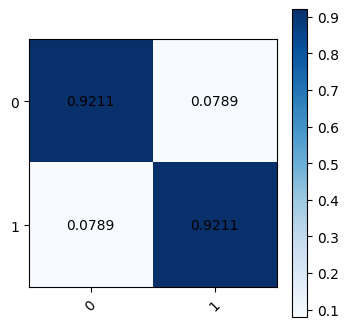

In [50]:
cm = confusion_matrix(Y_test_array.flatten(), predicciones_test.flatten())
cm = cm/np.sum(cm,axis=0)

cmap = plt.cm.Blues
tick_marks = np.arange(2)
fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j], decimals=4), ha="center", va="center")

fig.colorbar(im)
plt.xticks(tick_marks, rotation=45)
plt.yticks(tick_marks)
plt.show()

In [51]:
recall = recall_score(Y_test_array.flatten(), predicciones_test.flatten(), average='binary')
recall

0.9210526315789473

In [52]:
f1 = f1_score(Y_test_array.flatten(), predicciones_test.flatten(), average='binary')
f1

0.9210526315789473

#### Comprobaciones con Tensorflow

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation

In [54]:
X_train_tf = X_train_normalizado.to_numpy()
X_train_tf.shape

(455, 10)

In [55]:
Y_train_array_pre = Y_train.to_numpy()

In [56]:
Y_train_tf = np.eye(2)[Y_train_array_pre]

In [57]:
Y_train_tf.shape

(455, 2)

In [58]:
model_2 = Sequential([
    Dense(10, input_shape=(10,)),
    Activation('tanh'),
    Dense(12),
    Activation('tanh'),
    Dense(9),
    Activation('tanh'),
    Dense(5),
    Activation('tanh'),
    Dense(2),
    Activation('softmax'),
])

In [ ]:
model_2.summary()

In [60]:
sgd2 = optimizers.SGD(learning_rate=1.01)
model_2.compile(loss='categorical_crossentropy', optimizer=sgd2)

In [61]:
model_2.fit(X_train_tf, Y_train_tf, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
29/29 - 1s - loss: 0.6958 - 1s/epoch - 48ms/step
Epoch 2/100
29/29 - 0s - loss: 0.6490 - 213ms/epoch - 7ms/step
Epoch 3/100
29/29 - 0s - loss: 0.4335 - 110ms/epoch - 4ms/step
Epoch 4/100
29/29 - 0s - loss: 0.3656 - 121ms/epoch - 4ms/step
Epoch 5/100
29/29 - 0s - loss: 0.2706 - 63ms/epoch - 2ms/step
Epoch 6/100
29/29 - 0s - loss: 0.2718 - 69ms/epoch - 2ms/step
Epoch 7/100
29/29 - 0s - loss: 0.3456 - 130ms/epoch - 4ms/step
Epoch 8/100
29/29 - 0s - loss: 0.3507 - 105ms/epoch - 4ms/step
Epoch 9/100
29/29 - 0s - loss: 0.2529 - 80ms/epoch - 3ms/step
Epoch 10/100
29/29 - 0s - loss: 0.2396 - 51ms/epoch - 2ms/step
Epoch 11/100
29/29 - 0s - loss: 0.2814 - 40ms/epoch - 1ms/step
Epoch 12/100
29/29 - 0s - loss: 0.2646 - 47ms/epoch - 2ms/step
Epoch 13/100
29/29 - 0s - loss: 0.1985 - 48ms/epoch - 2ms/step
Epoch 14/100
29/29 - 0s - loss: 0.2024 - 41ms/epoch - 1ms/step
Epoch 15/100
29/29 - 0s - loss: 0.1845 - 44ms/epoch - 2ms/step
Epoch 16/100
29/29 - 0s - loss: 0.2085 - 43ms/epoch - 1ms/st

In [62]:
predicts = model_2.predict(X_train_tf)
predicts.shape

15/15 [==============================] - 0s 2ms/step


(455, 2)

In [63]:
Y_train_tf.shape

(455, 2)

In [64]:
accuracy(Y=Y_train_tf.T, predicciones=predicts.T)

0.9428571428571428